In [ ]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

#Machine Learning
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
df=pd.read_csv("/content/Wine_Quality_Data.csv")

In [ ]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [ ]:
# dependent=Quality, supervised classification
category_column=["quality"]
continous_column=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']


In [ ]:
df.drop("color",axis=1,inplace=True)

In [ ]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


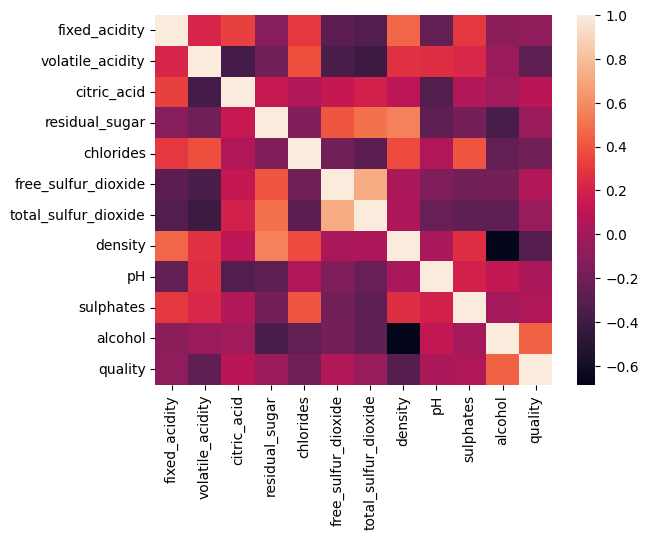

In [ ]:
sns.heatmap(df.corr())
plt.show()

**Hypothesis Test**

In [ ]:
def central_limit_theorem(continous_column,sample_size,rage):
  result_centrallimit={}
  pop=df[continous_column].values
  population_mean=pop.mean()
  allsample=[]
  for i in range(rage):
     sample=np.random.choice(pop,sample_size)
     allsample.append(sample.mean())
  all_sample_mean=(np.mean(allsample))
  result_centrallimit.update({'Column Name':continous_column,
                       'Population mean':population_mean,
                       'Allsample mean':all_sample_mean
                       })
  if continous_column:
    H0_accepted=0
    H0_rejected=0
    for i in range(rage):
      sample1=df[continous_column].sample(frac=0.04)
      t_test,p_value=stats.ttest_1samp(sample1,df[continous_column].mean())
      if p_value<0.05:
        H0_rejected+=1
      else:
        H0_accepted+=1
      if H0_accepted>H0_rejected:
        result_centrallimit.update({'Onesamplettest':' H0-There is no significant difference','Ttest':t_test,
                                    'pvalue':p_value})
      else:
        result_centrallimit.update({'Onesamplettest':' Ha-There is significant difference','Ttest':t_test,'pvalue':p_value})
    return(result_centrallimit)


In [ ]:
res=[]
for i in continous_column:
  s=central_limit_theorem(i,50,10)
  res.append(s)
pd.DataFrame(res)

,Column Name,Population mean,Allsample mean,Onesamplettest,Ttest,pvalue
0,fixed_acidity,7.215307,7.298100,H0-There is no significant difference,0.096168,0.923462
1,volatile_acidity,0.339666,0.347690,H0-There is no significant difference,-0.749629,0.454159
2,citric_acid,0.318633,0.309760,H0-There is no significant difference,0.780866,0.435594
3,residual_sugar,5.443235,5.291800,H0-There is no significant difference,1.533734,0.126316
4,chlorides,0.056034,0.055728,H0-There is no significant difference,-1.395873,0.163948
5,free_sulfur_dioxide,30.525319,30.793000,H0-There is no significant difference,0.198426,0.842868
6,total_sulfur_dioxide,115.744574,120.806000,H0-There is no significant difference,-0.022763,0.981857
7,density,0.994697,0.994503,H0-There is no significant difference,0.526843,0.598753
8,pH,3.218501,3.223700,H0-There is no significant difference,0.091639,0.927055
9,sulphates,0.531268,0.530800,H0-There is no significant difference,-0.161802,0.871588


In [ ]:
def twosamplettest(continous_column1,continous_column2,sample_size,rage):
   H0_accepted=0
   H0_rejected=0
   result={}
   allsample1=[]
   allsample2=[]
   for i in range(rage):
     sample1=df[continous_column1].sample(frac=0.2)
     sample2=df[continous_column2].sample(frac=0.2)
     t_test,p_value=stats.ttest_ind(sample1,sample2)
     if p_value<0.05:
        H0_rejected+=1
     else:
        H0_accepted+=1
     if H0_accepted>H0_rejected:
         result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest':'H0-There is no significant difference',
             't_test_value':t_test,
              'P_value':p_value})
     else:
         result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest':' Ha-There is significant difference',
              't_test_value':t_test,
              'P_value':p_value})
   if continous_column1:
     H0_accepted=0
     H0_rejected=0
     for i in range(rage):
         column1=df[continous_column1]
         column2=df[continous_column2]
         sample1=np.random.choice(column1,sample_size)
         sample2=np.random.choice(column2,sample_size)
         allsample1.append(sample1.mean())
         allsample2.append(sample2.mean())
     t_test,p_value=stats.ttest_ind(allsample1,allsample2)
     if p_value<0.05:
              H0_rejected+=1
     else:
            H0_accepted+=1
     if H0_accepted>H0_rejected:
              result.update({
             'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':'H0-There is no significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})
     else:
              result.update({
              'column':continous_column1+"&"+continous_column2,
             'twosamplettest central':' Ha-There is significant difference',
             't_test_valuone':t_test,
             'P_valueone':p_value})

   return result

In [ ]:
columns=continous_column
res1=[]
for i in range (len(columns)-1):
  column1=columns[i]
  for j in range(i+1,len(columns)):
      column2=columns[j]
      j=twosamplettest(column1,column2,50,10)
      res1.append(j)
pd.DataFrame(res1)

,column,twosamplettest,t_test_value,P_value,twosamplettest central,t_test_valuone,P_valueone
0,fixed_acidity&volatile_acidity,Ha-There is significant difference,195.658940,0.000000e+00,Ha-There is significant difference,116.311875,2.396389e-27
1,fixed_acidity&citric_acid,Ha-There is significant difference,192.503104,0.000000e+00,Ha-There is significant difference,129.399215,3.523453e-28
2,fixed_acidity&residual_sugar,Ha-There is significant difference,12.488711,8.427676e-35,Ha-There is significant difference,6.620674,3.242602e-06
3,fixed_acidity&chlorides,Ha-There is significant difference,193.498555,0.000000e+00,Ha-There is significant difference,88.190081,3.464083e-25
4,fixed_acidity&free_sulfur_dioxide,Ha-There is significant difference,-50.572843,0.000000e+00,Ha-There is significant difference,-29.934004,8.334983e-17
5,fixed_acidity&total_sulfur_dioxide,Ha-There is significant difference,-68.606197,0.000000e+00,Ha-There is significant difference,-54.603333,1.876863e-21
6,fixed_acidity&density,Ha-There is significant difference,175.386317,0.000000e+00,Ha-There is significant difference,113.482337,3.731061e-27
7,fixed_acidity&pH,Ha-There is significant difference,107.703603,0.000000e+00,Ha-There is significant difference,93.073935,1.315572e-25
8,fixed_acidity&sulphates,Ha-There is significant difference,184.728992,0.000000e+00,Ha-There is significant difference,119.111351,1.562654e-27
9,fixed_acidity&alcohol,Ha-There is significant difference,-66.344829,0.000000e+00,Ha-There is significant difference,-35.798782,3.501922e-18


**Data Visualization**

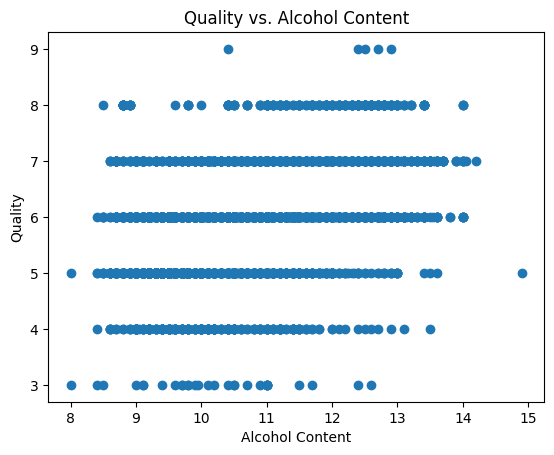

In [ ]:

plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.title('Quality vs. Alcohol Content')
plt.show()

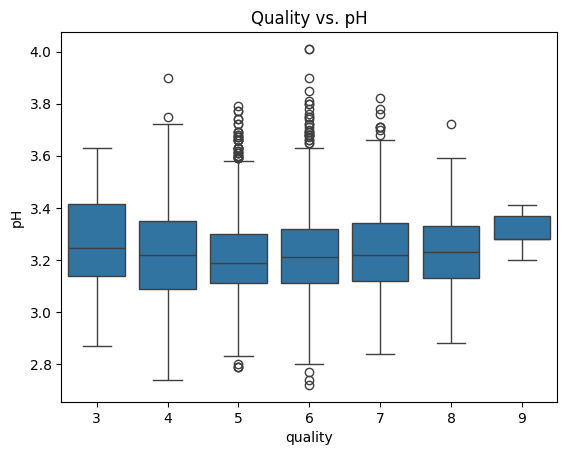

In [ ]:
sns.boxplot(x='quality', y='pH', data=df)
plt.title('Quality vs. pH')
plt.show()


Text(0.5, 1, 'Pairplot of Select columns')

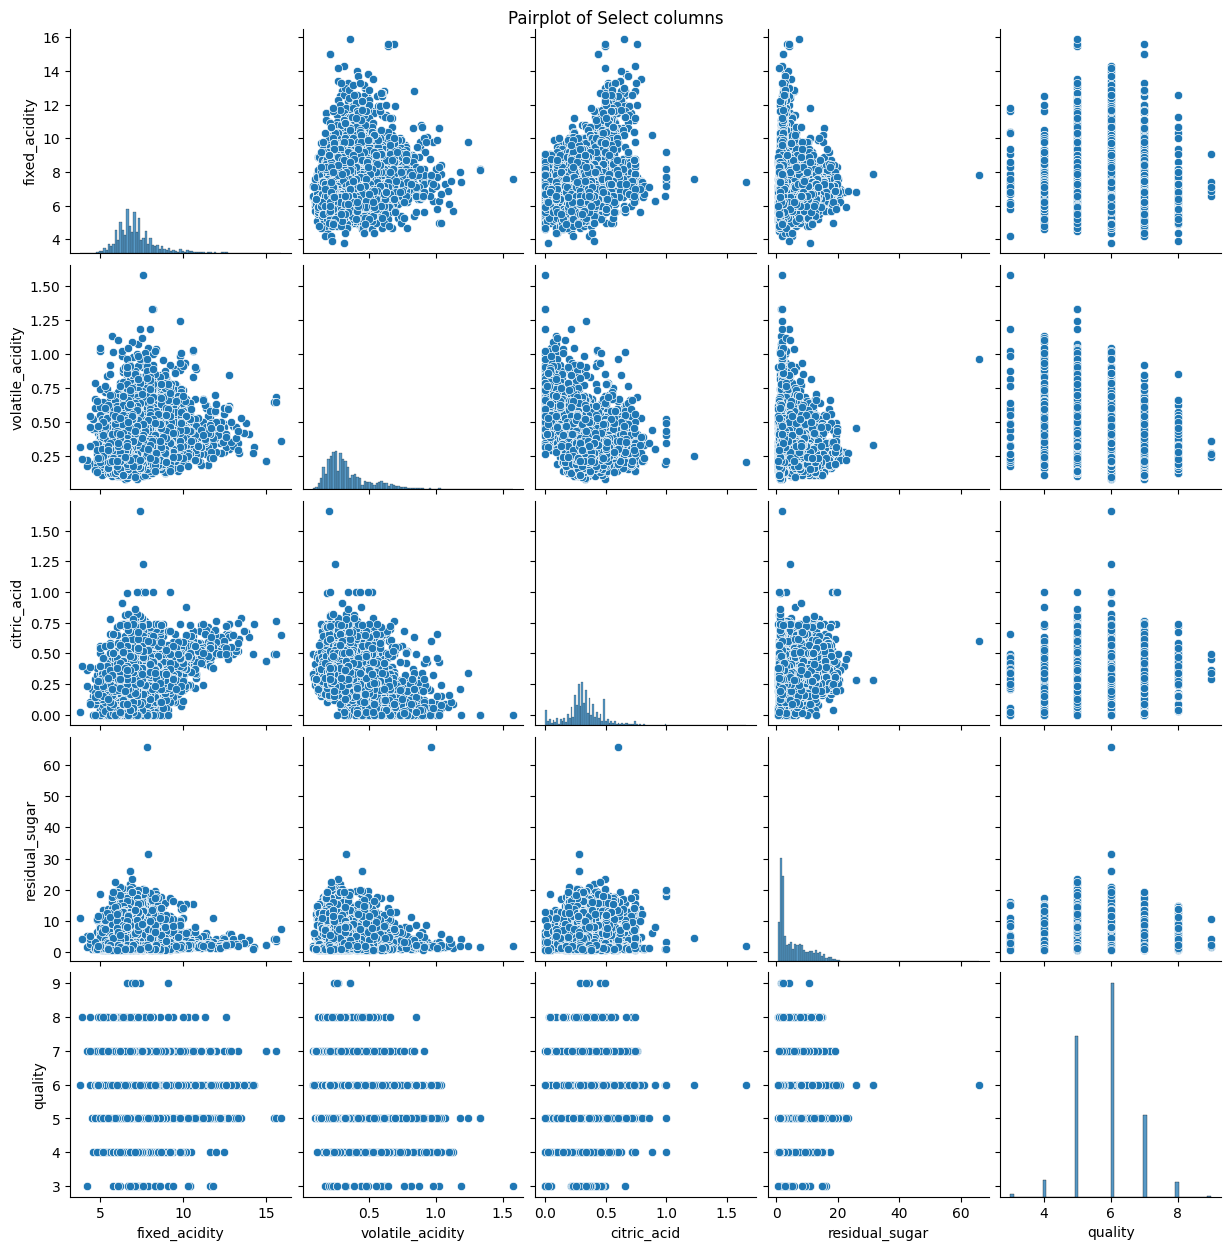

In [ ]:

a=sns.pairplot(df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'quality']])
a.fig.suptitle('Pairplot of Select columns',y=1)


**Machine Learning**

In [ ]:
x=df.drop("quality",axis=1)
y=df["quality"]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
model=AdaBoostClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.3926153846153846

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model1=DecisionTreeClassifier().fit(x_train,y_train)
y_pred1=model1.predict(x_test)


In [ ]:
accuracy_score(y_test,y_pred1)

0.6067692307692307